# Correlation

In [ ]:
# I downloaded a data set from Kaggle called "Professional Hockey Database"

In [53]:
# Import Data Libraries

import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in data
df = pd.read_csv(r'Downloads/scoring.csv')

In [54]:
# Looking at data
df

,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
0,ANA,NHL,C,3.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANA,NHL,C,73.0,3.0,5.0,8.0,24.0,-12.0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ANA,NHL,C,63.0,7.0,11.0,18.0,26.0,-13.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANA,NHL,C,12.0,1.0,1.0,2.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CIN,WHA,D,17.0,1.0,0.0,1.0,12.0,-3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45962,MIN,NHL,D,66.0,4.0,12.0,16.0,34.0,-7.0,2.0,...,1.0,1.0,14.0,-3.0,0.0,0.0,0.0,0.0,0.0,30.0
45963,MIN,NHL,D,65.0,8.0,13.0,21.0,48.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45964,MIN,NHL,D,57.0,7.0,11.0,18.0,50.0,-12.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45965,CAL,NHL,D,49.0,1.0,5.0,6.0,30.0,-2.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0


In [55]:
# Loop through the data to see if anything is missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

tmID - 0%
lgID - 0%
pos - 1%
GP - 1%
G - 1%
A - 1%
Pts - 1%
PIM - 1%
+/- - 21%
PPG - 18%
PPA - 50%
SHG - 18%
SHA - 49%
GWG - 20%
GTG - 39%
SOG - 21%
PostGP - 58%
PostG - 58%
PostA - 58%
PostPts - 58%
PostPIM - 58%
Post+/- - 76%
PostPPG - 68%
PostPPA - 81%
PostSHG - 68%
PostSHA - 81%
PostGWG - 66%
PostSOG - 77%


In [56]:
# Data Types for our columns
print(df.dtypes)

tmID        object
lgID        object
pos         object
GP         float64
G          float64
A          float64
Pts        float64
PIM        float64
+/-        float64
PPG        float64
PPA        float64
SHG        float64
SHA        float64
GWG        float64
GTG        float64
SOG        float64
PostGP     float64
PostG      float64
PostA      float64
PostPts    float64
PostPIM    float64
Post+/-    float64
PostPPG    float64
PostPPA    float64
PostSHG    float64
PostSHA    float64
PostGWG    float64
PostSOG    float64
dtype: object


<Axes: >

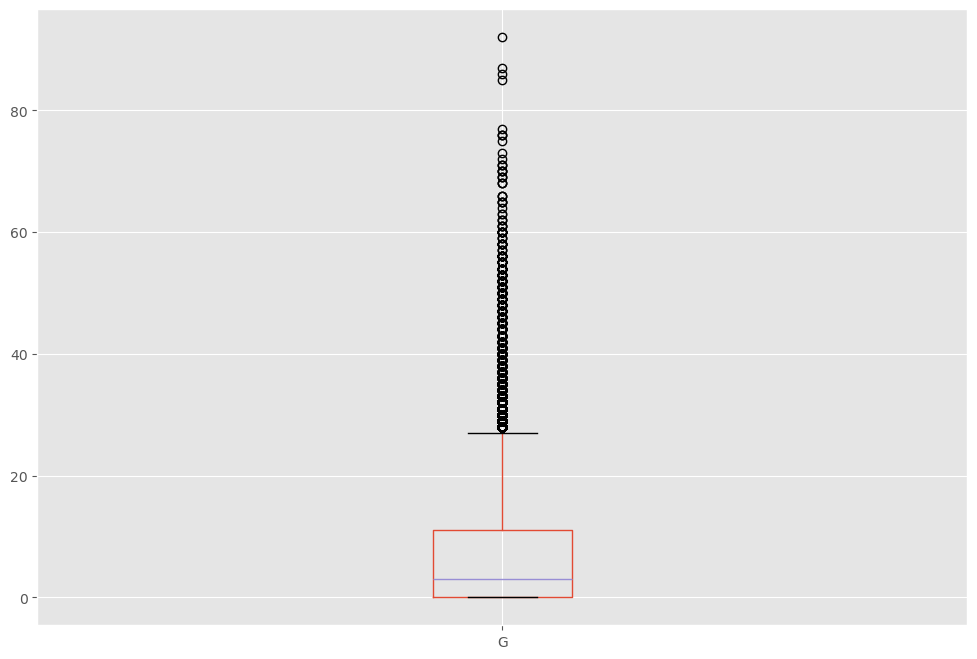

In [57]:
# Finding outliers for goals

df.boxplot(column=['G'])

In [58]:
df.drop_duplicates()

,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
0,ANA,NHL,C,3.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANA,NHL,C,73.0,3.0,5.0,8.0,24.0,-12.0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ANA,NHL,C,63.0,7.0,11.0,18.0,26.0,-13.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANA,NHL,C,12.0,1.0,1.0,2.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CIN,WHA,D,17.0,1.0,0.0,1.0,12.0,-3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45962,MIN,NHL,D,66.0,4.0,12.0,16.0,34.0,-7.0,2.0,...,1.0,1.0,14.0,-3.0,0.0,0.0,0.0,0.0,0.0,30.0
45963,MIN,NHL,D,65.0,8.0,13.0,21.0,48.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45964,MIN,NHL,D,57.0,7.0,11.0,18.0,50.0,-12.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45965,CAL,NHL,D,49.0,1.0,5.0,6.0,30.0,-2.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0


In [59]:
# Order data by goals

df.sort_values(by=['G'], inplace=False, ascending=False)

,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
14884,EDM,NHL,C,80.0,92.0,120.0,212.0,26.0,81.0,18.0,...,7.0,12.0,8.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
14886,EDM,NHL,C,74.0,87.0,118.0,205.0,39.0,76.0,20.0,...,22.0,35.0,12.0,18.0,2.0,NaN,0.0,NaN,3.0,86.0
18264,STL,NHL,R,78.0,86.0,45.0,131.0,22.0,23.0,29.0,...,8.0,19.0,4.0,5.0,3.0,1.0,0.0,0.0,2.0,58.0
23609,PIT,NHL,C,76.0,85.0,114.0,199.0,100.0,41.0,31.0,...,7.0,19.0,16.0,-1.0,7.0,3.0,1.0,0.0,0.0,41.0
18251,WIJ,WHA,L,78.0,77.0,65.0,142.0,41.0,55.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44535,WAS,NHL,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44655,BUF,NHL,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
44935,BOS,NHL,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44939,DET,NHL,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='G', ylabel='PostSOG'>

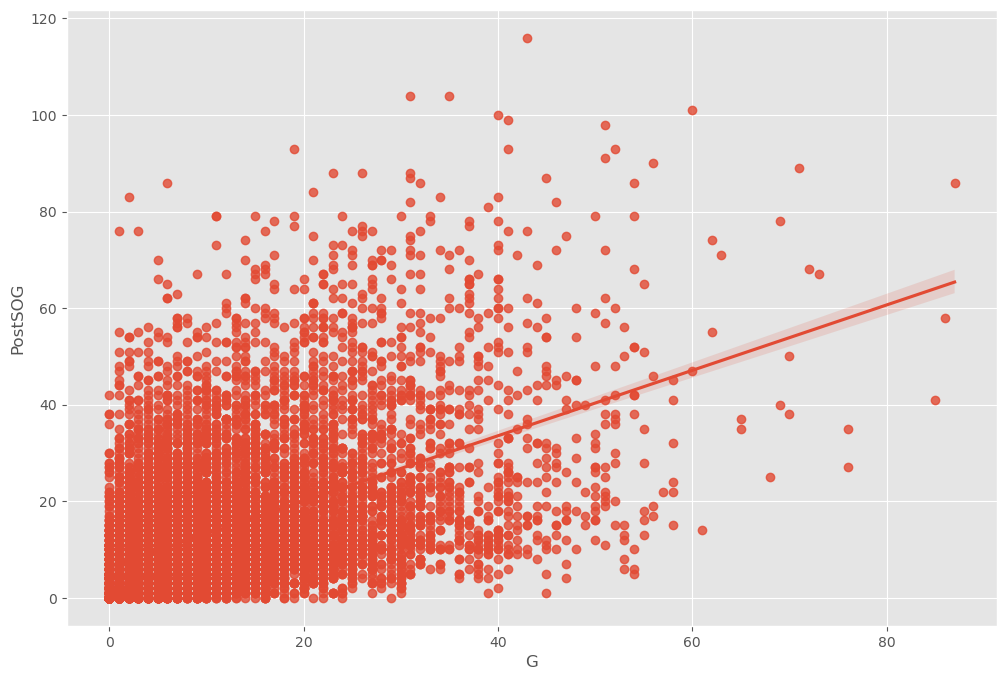

In [31]:
# Table of goals and shots on goal

sns.regplot(x="G", y="PostSOG", data=df)

<Axes: xlabel='Pts', ylabel='G'>

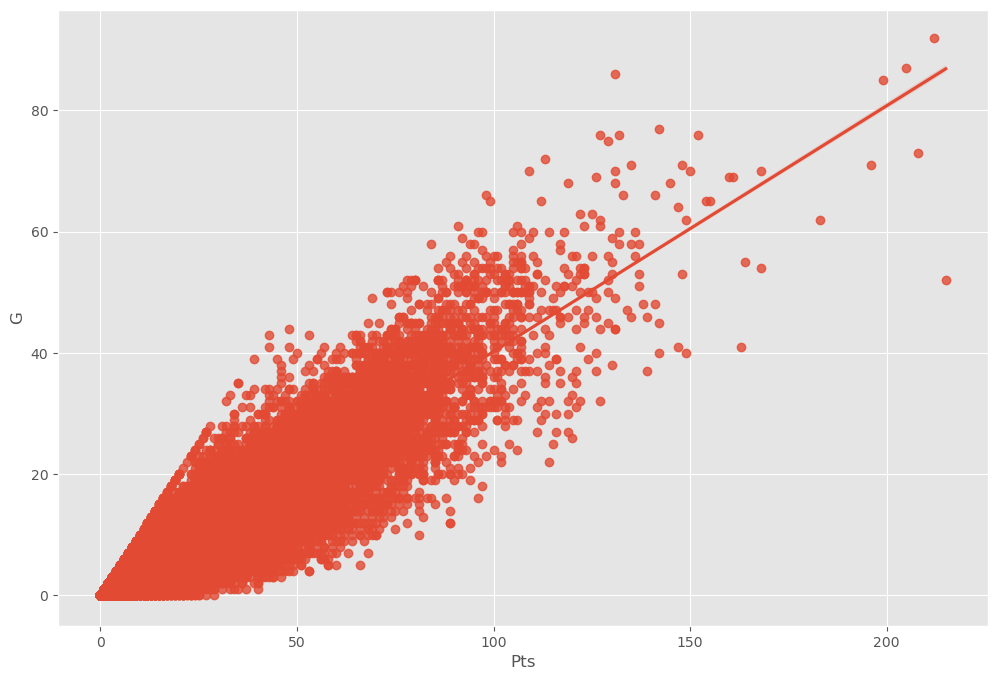

In [60]:
# Goals and points
sns.regplot(x="Pts", y="G", data=df)

In [62]:
#Correlation Matrix between all numeric columns

df.corr(numeric_only=True)

,GP,G,A,Pts,PIM,+/-,PPG,PPA,SHG,SHA,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
GP,1.000000,0.610337,0.719215,0.708988,0.549094,0.104956,0.485986,0.508373,0.314600,0.362166,...,0.278855,0.286545,0.169307,0.029653,0.167230,0.188724,0.084808,0.084771,0.140998,0.296009
G,0.610337,1.000000,0.802019,0.929956,0.278473,0.233602,0.857725,0.682804,0.437421,0.304269,...,0.430091,0.519743,0.094201,0.042336,0.435690,0.386662,0.156447,0.070255,0.329666,0.523182
A,0.719215,0.802019,1.000000,0.965452,0.350848,0.289651,0.740672,0.890830,0.380483,0.405157,...,0.545133,0.559854,0.134251,0.071472,0.410455,0.528417,0.144420,0.124908,0.274270,0.514808
Pts,0.708988,0.929956,0.965452,1.000000,0.337456,0.278951,0.825851,0.844409,0.422859,0.381383,...,0.528051,0.577113,0.124818,0.062878,0.445796,0.498610,0.158250,0.108611,0.315309,0.548714
PIM,0.549094,0.278473,0.350848,0.337456,1.000000,0.040090,0.200419,0.194166,0.111908,0.170912,...,0.107666,0.100486,0.531421,0.014020,0.033746,0.035302,0.012716,0.034615,0.031360,0.079968
+/-,0.104956,0.233602,0.289651,0.278951,0.040090,1.000000,0.138637,0.155215,0.157281,0.164356,...,0.329702,0.333502,0.128543,0.204969,0.181748,0.220531,0.111551,0.088500,0.184873,0.304350
PPG,0.485986,0.857725,0.740672,0.825851,0.200419,0.138637,1.000000,0.732093,0.277982,0.224186,...,0.405924,0.473515,0.051575,0.014470,0.470260,0.437756,0.088587,0.061268,0.293904,0.476719
PPA,0.508373,0.682804,0.890830,0.844409,0.194166,0.155215,0.732093,1.000000,0.277130,0.285977,...,0.513711,0.512771,0.065755,0.038497,0.430564,0.578798,0.101469,0.102406,0.237208,0.472767
SHG,0.314600,0.437421,0.380483,0.422859,0.111908,0.157281,0.277982,0.277130,1.000000,0.404199,...,0.217817,0.248083,0.027553,0.068215,0.133714,0.161191,0.255550,0.131686,0.142557,0.247939
SHA,0.362166,0.304269,0.405157,0.381383,0.170912,0.164356,0.224186,0.285977,0.404199,1.000000,...,0.197190,0.196656,0.052852,0.041617,0.117625,0.158412,0.151935,0.164344,0.077353,0.176863


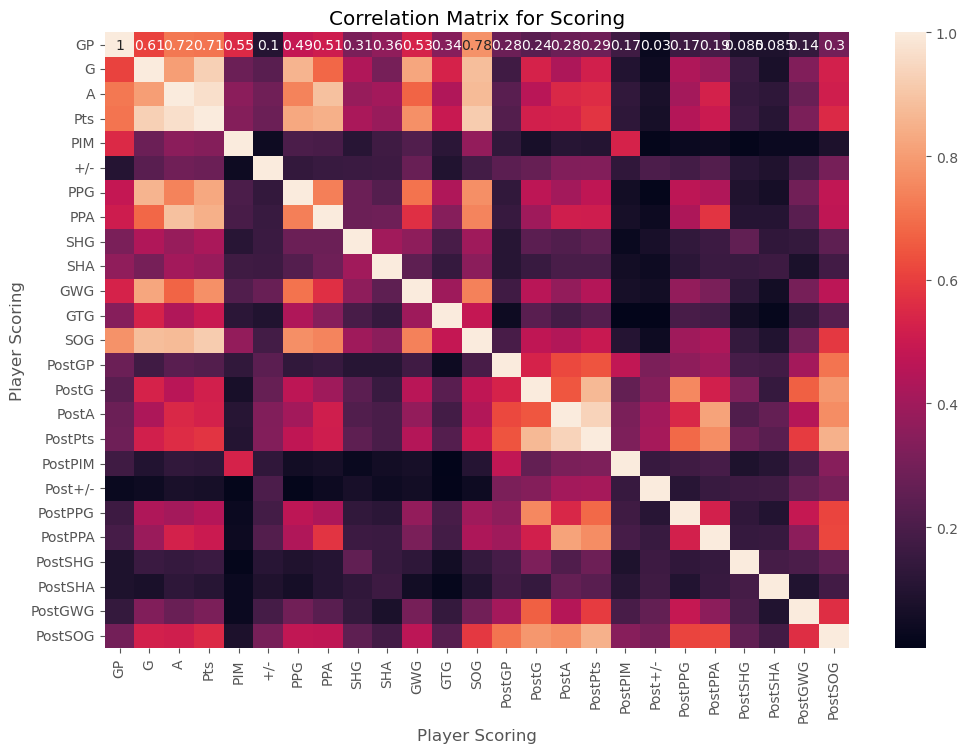

In [64]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Scoring")
plt.xlabel("Player Scoring")
plt.ylabel("Player Scoring")
plt.show()

In [68]:
# Looking at the top 15 teams with the most goals scored

TeamSum = df.groupby('tmID')[["G"]].sum()
TeamSumSorted = TeamSum.sort_values('G',ascending = False)[:15]
TeamSumSorted = TeamSumSorted['G'].astype('int64')
TeamSumSorted

tmID
MTL    19896
BOS    19067
NYR    18031
TOR    17927
DET    17798
CHI    17496
PHI    11760
PIT    11696
LAK    11260
STL    10842
BUF    10825
VAN    10344
NYI    10072
WAS     9377
EDM     8880
Name: G, dtype: int64